In [ ]:
!pip install tensorflow tensorflow_hub matplotlib

Saving 360_F_836288757_dP7e8rFoSFeso8xpuA4r9qD0EtlZkVNs.jpg to 360_F_836288757_dP7e8rFoSFeso8xpuA4r9qD0EtlZkVNs (4).jpg
Saving subtle-desires-jai-johnson.jpg to subtle-desires-jai-johnson (2).jpg


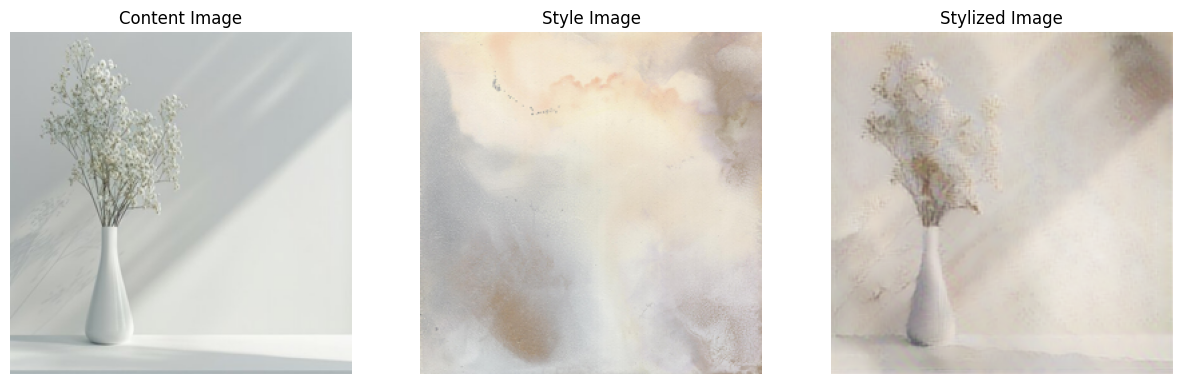

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from google.colab import files

def load_img(path_to_img):
    img = Image.open(path_to_img)
    img = img.resize((256, 256))
    img = np.array(img) / 255.0
    img = img.astype('float32')
    return img

uploaded = files.upload()
image_paths = list(uploaded.keys())
content_path = image_paths[0]
style_path = image_paths[1]

content_image = load_img(content_path)
style_image = load_img(style_path)

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

stylized_image = hub_model(tf.constant(content_image[tf.newaxis, ...]),tf.constant(style_image[tf.newaxis, ...]))[0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Content Image")
plt.imshow(content_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Style Image")
plt.imshow(style_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Stylized Image")
plt.imshow(stylized_image[0])
plt.axis('off')

plt.show()